In [47]:
%matplotlib inline

In [48]:
import pandas as pd
from pandas import DataFrame, Series
import numpy as np
import math
# NLP Libraries
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize, PunktSentenceTokenizer
from nltk.corpus import stopwords, state_union, wordnet
from nltk.corpus import wordnet_ic as wnic
from nltk.stem import PorterStemmer 

In [49]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)
%matplotlib inline

In [50]:
df = pd.read_csv('train.csv')


In [51]:
df.tail(10)

,id,qid1,qid2,question1,question2,is_duplicate
404280,404280,537922,537923,What are some outfit ideas to wear to a frat p...,What are some outfit ideas wear to a frat them...,1
404281,404281,99131,81495,Why is Manaphy childish in Pokémon Ranger and ...,Why is Manaphy annoying in Pokemon ranger and ...,1
404282,404282,1931,16773,How does a long distance relationship work?,How are long distance relationships maintained?,1
404283,404283,537924,537925,What do you think of the removal of the MagSaf...,What will the CPU upgrade to the 2016 Apple Ma...,0
404284,404284,537926,537927,What does Jainism say about homosexuality?,What does Jainism say about Gays and Homosexua...,1
404285,404285,433578,379845,How many keywords are there in the Racket prog...,How many keywords are there in PERL Programmin...,0
404286,404286,18840,155606,Do you believe there is life after death?,Is it true that there is life after death?,1
404287,404287,537928,537929,What is one coin?,What's this coin?,0
404288,404288,537930,537931,What is the approx annual cost of living while...,I am having little hairfall problem but I want...,0
404289,404289,537932,537933,What is like to have sex with cousin?,What is it like to have sex with your cousin?,0


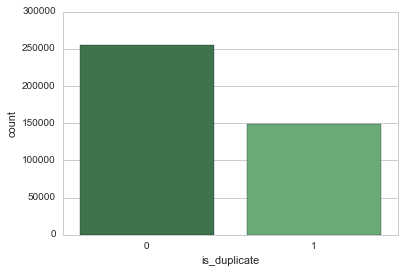

In [52]:
sns.countplot(x="is_duplicate", data=df, palette="Greens_d")

### 1. Method : Compuing vector Similarity Matrix 
##### : cos(q) anle between the vecotrs (questions)

In [53]:
# function of clean the text
# Removing stop words

def filterSentence(text):
    filtered_sen = []
    try:
        text = text.encode("ascii")
    except UnicodeEncodeError as e:
        text  = text.encode("utf-8")
    except UnicodeDecodeError as e:
        text = text.decode("utf-8")
        
    # List of Stop Words
    stop = set(stopwords.words('english'))
    
    for i in word_tokenize(text):
        if i not in stop:
            filtered_sen.append(i)
    return filtered_sen 


In [54]:
# Building a wordnet Set for each question or query passed

def getDistinctKeywords(quey1,query2):
    tokenSet = set()
    for token in query1:
        tokenSet.add(token)
    for token in query2:
        tokenSet.add(token)
    return tokenSet


In [55]:
# building an utlity matric with q*words with question pairs as rows and Words union as columns

def similarDataFrame(tokenSet,query1,query2):
    q1_vector =[]
    q2_vector =[]
    for i in tokenSet:
        if i in query1:
            q1_vector.append(int(1))
        else:
            q1_vector.append(int(0))

    for i in tokenSet:
        if i in query2:
            q2_vector.append(int(1))
        else:
            q2_vector.append(int(0))
    
    values = [(q1_vector), (q2_vector)]
    labels = list(tokenSet)
    
    #converting query Vector lists into a DataFrame
    similarity_df = pd.DataFrame.from_records(values, columns = labels, index = ['q1','q2'])
    return similarity_df,q1_vector,q2_vector
    

In [56]:
# compute Cosine distance between the two rows of matrices

def calcVectorSpaceMatrix(similarity_df,q1_vector,q2_vector):
    similarity_Matrix = similarity_df.as_matrix() 
    q_dot = np.dot(similarity_Matrix[0],similarity_Matrix[1])
    
    # mapping the vectors as squares, calculating their sums and then their Square roots
    q_length1 = math.sqrt(reduce(lambda x,y: x+y,map(lambda x:x*x,q1_vector)))
    q_length2 = math.sqrt(reduce(lambda x,y: x+y,map(lambda x:x*x,q2_vector)))
    
    # cosine Distance formula
    correlation = (q_dot/float(q_length1*q_length2))
    if correlation >=0.5:
        dup = 1
    else:
        dup = 0
    
    return correlation,dup

def predIsDup():
    if df['corr'] >= 0.5:
        df['pred_isDuplicate'] = True
    else:
        df['pred_isDuplicate'] = False
        

In [65]:
# Main Function

df['new_col'] = list(zip(df.question1, df.question2))
corr =[]
dup =[]
for q1,q2 in df[:1].new_col:
    
    query1 = filterSentence (q1)
    query2 = filterSentence (q2)

    distinctTerms = getDistinctKeywords(query1,query2)
    similarity_df,q1_vector,q2_vector = similarDataFrame(distinctTerms,query1,query2)
    corrs, dups = (calcVectorSpaceMatrix(similarity_df,q1_vector,q2_vector))
    corr.append(corrs)
    dup.append(dups)
    print q1_vector
    print q2_vector
    print similarity_df
    similarity_Matrix = similarity_df.as_matrix() 
    print similarity_Matrix
    print corrs, dups


new_df = df[:100]
df['corr'] = Series(corr)
df['pred_isDuplicate'] = Series(dup)

acc_df = df.head(200)

[1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 0, 1, 1]
    What  invest  share  step  ?  india  guide  market
q1     1       1      1     1  1      1      1       1
q2     1       1      1     1  1      0      1       1
[[1 1 1 1 1 1 1 1]
 [1 1 1 1 1 0 1 1]]
0.935414346693 1


In [58]:
acc_df

,id,qid1,qid2,question1,question2,is_duplicate,new_col,corr,pred_isDuplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,(What is the step by step guide to invest in s...,0.935414,1.0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,(What is the story of Kohinoor (Koh-i-Noor) Di...,NaN,NaN
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,(How can I increase the speed of my internet c...,NaN,NaN
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,(Why am I mentally very lonely? How can I solv...,NaN,NaN
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,"(Which one dissolve in water quikly sugar, sal...",NaN,NaN
5,5,11,12,Astrology: I am a Capricorn Sun Cap moon and c...,"I'm a triple Capricorn (Sun, Moon and ascendan...",1,(Astrology: I am a Capricorn Sun Cap moon and ...,NaN,NaN
6,6,13,14,Should I buy tiago?,What keeps childern active and far from phone ...,0,"(Should I buy tiago?, What keeps childern acti...",NaN,NaN
7,7,15,16,How can I be a good geologist?,What should I do to be a great geologist?,1,"(How can I be a good geologist?, What should I...",NaN,NaN
8,8,17,18,When do you use シ instead of し?,"When do you use ""&"" instead of ""and""?",0,"(When do you use シ instead of し?, When do you ...",NaN,NaN
9,9,19,20,Motorola (company): Can I hack my Charter Moto...,How do I hack Motorola DCX3400 for free internet?,0,(Motorola (company): Can I hack my Charter Mot...,NaN,NaN


In [59]:
#Calculating Statitical Measures

org_mean = Series(acc_df['is_duplicate'])
pred_mean = Series(acc_df['pred_isDuplicate'])
print "Orignal Mean Value: ", np.mean(org_mean)
print "Redicted Mean Value: ", np.mean(pred_mean)

Orignal Mean Value:  0.36
Redicted Mean Value:  1.0


In [60]:
acc_df.describe()

,id,qid1,qid2,is_duplicate,corr,pred_isDuplicate
count,200.000000,200.000000,200.000000,200.000000,1.000000,1.0
mean,99.500000,200.000000,201.000000,0.360000,0.935414,1.0
std,57.879185,115.758369,115.758369,0.481205,NaN,NaN
min,0.000000,1.000000,2.000000,0.000000,0.935414,1.0
25%,49.750000,100.500000,101.500000,0.000000,0.935414,1.0
50%,99.500000,200.000000,201.000000,0.000000,0.935414,1.0
75%,149.250000,299.500000,300.500000,1.000000,0.935414,1.0
max,199.000000,399.000000,400.000000,1.000000,0.935414,1.0


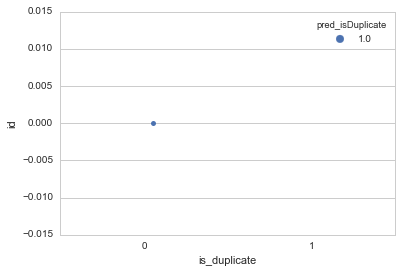

In [61]:

#Actual
sns.stripplot(x="is_duplicate", y="id", hue="pred_isDuplicate",data=acc_df, jitter=True);
            

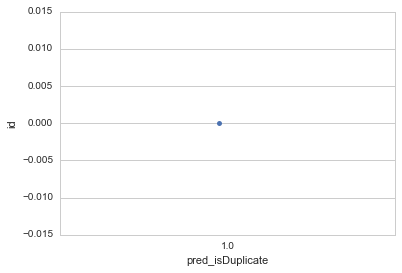

In [62]:

sns.stripplot(x="pred_isDuplicate", y="id", data=acc_df, jitter=True);